<a href="https://colab.research.google.com/github/LilianYou/Sea_Hero_Quest/blob/main/Raw_UserData_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# User Data Pre-Processing

- variable meanings are documented in shq_variables.html
- The following codes are used to remove invalid rows and clean up typos

In [1]:
# import library and show all the rows when print out the whole dataframe
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

### Revert Json to CSV

In [ ]:
#df = pd.read_json(r'2019-12-16-latest-users.json',lines=True)
#df.to_csv(r'2019-12-16-latest-users.csv', index = None)

### Raw Data Info

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Data

/content/drive/.shortcut-targets-by-id/1pS1W_QFv_TreubUVne2-kLNgsBSGwhhw/Data


In [4]:
user_df = pd.read_csv('2019-12-16-latest-users.csv')
user_df.head()

,uuid,stored_at,activity_recent,activityrecent,age,education,gender,hand,home_environment,location,navigating_skills,sleep,travel_time
0,66857759-5d93-4635-914f-b643e34a7519,2018-04-11 13:37:03+00:00,NaN,NaN,16.0,high-school,m,right,suburbs,US,very-good,6.0,30-mins-to-1-hour
1,2d51b872-d192-4392-851e-e693d4576980,2016-06-22 07:43:52+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01d4e1af-2691-4312-b3f2-9b27c28e7578,2016-05-16 11:27:24+00:00,NaN,NaN,99.0,NaN,m,NaN,NaN,LB,NaN,NaN,NaN
3,30a73f52-9bfd-4310-b284-58a896428c0a,2017-08-30 22:47:44+00:00,NaN,NaN,68.0,college,f,right,city,CA,bad,8.0,less-30-mins
4,e1cecc23-b523-42f8-9b58-520ae053b48e,2016-07-31 23:36:48+00:00,NaN,NaN,18.0,high-school,m,left,mixed,SK,good,7.0,less-30-mins


### Drop useless columns

In [6]:
# drop the variables useless to the demographical analysis
user_drop = user_df.copy() #store check points
user_drop = user_drop.drop(['stored_at','activity_recent','activityrecent'],axis=1)
user_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936867 entries, 0 to 3936866
Data columns (total 10 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uuid               object 
 1   age                float64
 2   education          object 
 3   gender             object 
 4   hand               object 
 5   home_environment   object 
 6   location           object 
 7   navigating_skills  object 
 8   sleep              float64
 9   travel_time        object 
dtypes: float64(2), object(8)
memory usage: 300.4+ MB


### Drop rows with NA

In [7]:
user_drop = user_drop.dropna()

In [8]:
user_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085236 entries, 0 to 3936863
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   uuid               1085236 non-null  object 
 1   age                1085236 non-null  float64
 2   education          1085236 non-null  object 
 3   gender             1085236 non-null  object 
 4   hand               1085236 non-null  object 
 5   home_environment   1085236 non-null  object 
 6   location           1085236 non-null  object 
 7   navigating_skills  1085236 non-null  object 
 8   sleep              1085236 non-null  float64
 9   travel_time        1085236 non-null  object 
dtypes: float64(2), object(8)
memory usage: 91.1+ MB


In [9]:
user_drop.describe()

,age,sleep
count,1.085236e+06,1.085236e+06
mean,3.490453e+01,7.269704e+00
std,1.744085e+01,1.740011e+00
min,1.600000e+01,1.000000e+00
25%,1.900000e+01,6.000000e+00
50%,3.000000e+01,7.000000e+00
75%,4.700000e+01,8.000000e+00
max,1.820000e+02,7.400000e+01


- **As shown in the summary table above, there are some invalid age values and sleep times**
- **Given that the minimum age value can be input is 16, 16 is also a suspicious value for age**
- **people older than 70 but also into playing video game are not representative**
- **select age range 19 - 70**
- **daily sleep hour larger than 13 hours or shorter than 2 hours (3sd away from the mean: 7.3 & based on previous sleep study) is suspicious**

In [10]:
user_clean = user_drop.copy()

In [11]:
user_clean = user_clean[(user_clean['sleep'] < 13) & (user_clean['sleep'] >2) ]

In [12]:
user_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066550 entries, 0 to 3936863
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   uuid               1066550 non-null  object 
 1   age                1066550 non-null  float64
 2   education          1066550 non-null  object 
 3   gender             1066550 non-null  object 
 4   hand               1066550 non-null  object 
 5   home_environment   1066550 non-null  object 
 6   location           1066550 non-null  object 
 7   navigating_skills  1066550 non-null  object 
 8   sleep              1066550 non-null  float64
 9   travel_time        1066550 non-null  object 
dtypes: float64(2), object(8)
memory usage: 89.5+ MB


In [13]:
user_clean = user_clean[user_clean['age'] <= 70]
user_clean = user_clean[user_clean['age'] > 18 ]
user_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797952 entries, 3 to 3936863
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               797952 non-null  object 
 1   age                797952 non-null  float64
 2   education          797952 non-null  object 
 3   gender             797952 non-null  object 
 4   hand               797952 non-null  object 
 5   home_environment   797952 non-null  object 
 6   location           797952 non-null  object 
 7   navigating_skills  797952 non-null  object 
 8   sleep              797952 non-null  float64
 9   travel_time        797952 non-null  object 
dtypes: float64(2), object(8)
memory usage: 67.0+ MB


In [14]:
user_clean["home_environment"].value_counts()/user_clean.shape[0]

suburbs    0.317779
city       0.307189
mixed      0.203512
rural      0.171518
City       0.000003
Name: home_environment, dtype: float64

In [15]:
user_clean["gender"].value_counts()/user_clean.shape[0]

m    0.522674
f    0.477313
o    0.000010
M    0.000003
Name: gender, dtype: float64

In [16]:
user_clean["hand"].value_counts()/user_clean.shape[0]

right    0.900502
left     0.099498
Name: hand, dtype: float64

In [17]:
user_clean["education"].value_counts()/user_clean.shape[0]

university     0.426742
college        0.267279
high-school    0.248451
unspecified    0.032981
no-formal      0.024544
College        0.000003
Name: education, dtype: float64

In [18]:
user_clean["navigating_skills"].value_counts()/user_clean.shape[0]

good         0.546148
very-good    0.318260
bad          0.114878
very-bad     0.020714
Name: navigating_skills, dtype: float64

In [19]:
user_clean["travel_time"].value_counts()/user_clean.shape[0]

less-30-mins            0.399580
30-mins-to-1-hour       0.346577
hour-plus               0.253840
Less than 30 minutes    0.000003
Name: travel_time, dtype: float64

- **As shown above, there are some typos**

### Clean up typos

In [20]:
user_clean['education'] = user_clean['education'].apply(lambda x: 'college' if x=='College' else x)
user_clean['gender'] = user_clean['gender'].apply(lambda x: 'm' if x=='M' else x)
user_clean['home_environment'] = user_clean['home_environment'].apply(lambda x: 'city' if x=='City' else x)
user_clean['travel_time'] = user_clean['travel_time'].apply(lambda x: 'less-30-mins' if x=='Less than 30 minutes' else x)

### Remove roles with useless levels

In [21]:
# remove rows where gender == o
user_clean = user_clean[user_clean['gender'] != 'o']

In [22]:
user_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797944 entries, 3 to 3936863
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               797944 non-null  object 
 1   age                797944 non-null  float64
 2   education          797944 non-null  object 
 3   gender             797944 non-null  object 
 4   hand               797944 non-null  object 
 5   home_environment   797944 non-null  object 
 6   location           797944 non-null  object 
 7   navigating_skills  797944 non-null  object 
 8   sleep              797944 non-null  float64
 9   travel_time        797944 non-null  object 
dtypes: float64(2), object(8)
memory usage: 67.0+ MB


In [26]:
# remove rows where education == unspecified
user_clean = user_clean[user_clean['education'] != 'unspecified']
user_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771628 entries, 3 to 3936863
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               771628 non-null  object 
 1   age                771628 non-null  float64
 2   education          771628 non-null  object 
 3   gender             771628 non-null  object 
 4   hand               771628 non-null  object 
 5   home_environment   771628 non-null  object 
 6   location           771628 non-null  object 
 7   navigating_skills  771628 non-null  object 
 8   sleep              771628 non-null  float64
 9   travel_time        771628 non-null  object 
dtypes: float64(2), object(8)
memory usage: 64.8+ MB


In [24]:
user_clean["gender"].value_counts()/user_clean.shape[0]

m    0.524158
f    0.475842
Name: gender, dtype: float64

In [25]:
user_clean["education"].value_counts()/user_clean.shape[0]

university     0.441299
college        0.276399
high-school    0.256922
no-formal      0.025380
Name: education, dtype: float64

### Check no curvilinear relationship between age and sleep

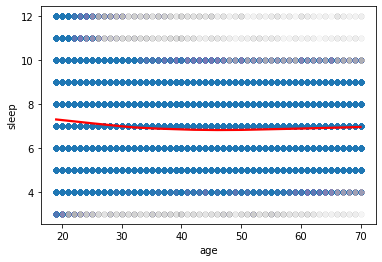

In [27]:
p1 = sns.regplot(x='age', y='sleep', data=user_clean,line_kws={'color': 'r'},scatter_kws={'alpha':0.005},lowess=True)

### Explore CSV File

In [ ]:
user_clean.to_csv("2019user_cleaned_3121970.csv",index=False)